# Descarregar i mostrar dades satelitals a travès de la llibreria de openEO

En aquest document trobarem un seguit de codis exemple que ens permetràn descarregar i observar imatges dels diferents satèlits copernicus/sentinel i de les seves bandes corresponents.

In [2]:
# Aquestes son algunes de les llibreries que cal installar
! pip install folium
! pip install openeo
! pip install xarray
! pip install libtiff
! pip install matplotlib
! pip install os

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


## Mapa interactiu

Aquest mapa no té res a veure amb les dades satèlitals, peró ens permetrà sel·leccionar les coordenades/regions que ens interessin per més endavant. 

In [ ]:
import folium
from folium import plugins

# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw


## Connexió al backend 

En aquest apartat ens conectarèm al backend de openEO, d'on descarregarèm les dades. 

In [4]:
import openeo # https://openeo.org/documentation/1.0/python/#collections

# Connexió al "Backend" d'on extreurèm les dades
backend = "openeo.dataspace.copernicus.eu"
conn = openeo.connect(backend).authenticate_oidc()

Authenticated using refresh token.


In [ ]:
# LLista de tots els satèlits disponibles
conn.list_collections()

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

## Filtratge de dades

En aquest subapartat veurem diverses formes de descarregar dades dels satèlits Copernicus/Sentinel a partir de la llibreria openeo 

### Sentinel 2-L2A: Descarrega bandes RGB

In [5]:
# Determinem area de busqueda (hauriem de fer que fos automàtic amb el mapa)
spatial_extent = {
    "west": 1.936725,
    "east": 2.259583,
    "south": 41.334633,
    "north": 41.427328,
}

temporal_extent = ["2023-01-01", "2023-02-01"] # Les dates estàn en notació: aaaa-mm-dd 


# Creem una variable filtre (aka: datacube)
datacube = conn.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=spatial_extent,
    temporal_extent= temporal_extent,
    bands=["B02", "B03", "B04"]
)

datacube = datacube.apply(lambda x: x / 10000) # Normalitzem

result = datacube.save_result("GTiff") # Diferents formats: {'CovJSON', 'CSV', 'JSON', 'PNG', 'netCDF', 'GTiff', 'Parquet'}

# Creating a new job at the back-end by sending the datacube information.
job = result.create_job()
job.start_and_wait()
job.get_results().download_files("output")


0:00:00 Job 'j-2409141dbe5641b39a333dbdd501db52': send 'start'
0:00:12 Job 'j-2409141dbe5641b39a333dbdd501db52': created (progress 0%)
0:00:18 Job 'j-2409141dbe5641b39a333dbdd501db52': created (progress 0%)
0:00:24 Job 'j-2409141dbe5641b39a333dbdd501db52': created (progress 0%)
0:00:32 Job 'j-2409141dbe5641b39a333dbdd501db52': created (progress 0%)
0:00:42 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:00:55 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:01:11 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:01:31 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:01:57 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:02:27 Job 'j-2409141dbe5641b39a333dbdd501db52': running (progress N/A)
0:03:05 Job 'j-2409141dbe5641b39a333dbdd501db52': finished (progress 100%)


[PosixPath('output/openEO_2023-01-02Z.tif'),
 PosixPath('output/openEO_2023-01-05Z.tif'),
 PosixPath('output/openEO_2023-01-07Z.tif'),
 PosixPath('output/openEO_2023-01-10Z.tif'),
 PosixPath('output/openEO_2023-01-15Z.tif'),
 PosixPath('output/openEO_2023-01-17Z.tif'),
 PosixPath('output/openEO_2023-01-20Z.tif'),
 PosixPath('output/openEO_2023-01-22Z.tif'),
 PosixPath('output/openEO_2023-01-25Z.tif'),
 PosixPath('output/openEO_2023-01-27Z.tif'),
 PosixPath('output/openEO_2023-01-30Z.tif'),
 PosixPath('output/job-results.json')]

### Sentinel 3_OLCI_L1B: Descarreguem bandes concretes

En aquest subapartat tornem a fer una descarrega, peró aquest cop del satèlit Sentinel3_OLCI_L1B. A més nomès agafarèm les bandes que ens interessen per a fer un seguiment tnat del clorofil com del "nivell" de les algues. 

In [ ]:
# Determinem area de busqueda (hauriem de fer que fos automàtic amb el mapa)
spatial_extent = {
    "west": 0.265355,
    "east": 1.22706,
    "south": 40.531226,
    "north": 40.914056,
}

temporal_extent = ["2023-01-01", "2024-01-01"] # Les dates estàn en notació: aaaa-mm-dd 


datacube = conn.load_collection(
    "SENTINEL3_OLCI_L1B",
    spatial_extent=spatial_extent,
    temporal_extent=temporal_extent,
    bands=["B03", "B04", "B05", "B09", "B10"]  # Bandas para detectar clorofila y algas
)

datacube = datacube.apply(lambda x: x / 10000) # Normalitzem les dades (se suposa que estan 0-10.000)

result = datacube.save_result("GTiff") 

job = result.create_job()
job.start_and_wait()
job.get_results().download_files("output/Deltebre_2023")

0:00:00 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': send 'start'
0:00:13 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': created (progress 0%)
0:00:19 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': created (progress 0%)
0:00:25 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': created (progress 0%)
0:00:33 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': created (progress 0%)
0:00:43 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:00:56 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:01:11 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:01:31 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:01:55 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:02:25 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:03:03 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:03:50 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progress N/A)
0:04:48 Job 'j-240914fa47ce4ee69fcac096fda6d3b3': running (progre

[PosixPath('output2/Deltebre_2023/openEO_2023-01-01Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-02Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-03Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-04Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-05Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-06Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-07Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-08Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-09Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-10Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-11Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-12Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-13Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-14Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-15Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO_2023-01-16Z.tif'),
 PosixPath('output2/Deltebre_2023/openEO

## Mostrar dades

Un cop descarregades les dades una de les coses que podem fer és mostrar-les. En el següents exeples mostrem com imprimir diferents tipus imatges .tif per pantalla. 

### Imprimir 3-Bandes RGB

Aquest és un exemple bàsic d'impresió a 3 bandes, matplotlib automaticament les detecta i (en l'ordre en que estiguin) lis asigna un color Red, Green o Blue. Veurem que al imprimir dues bandes hem de fer cheats.

TIFFReadDirectory: Warning, Unknown field with tag 33550 (0x830e) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 33922 (0x8482) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42112 (0xa480) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42113 (0xa481) encountered.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


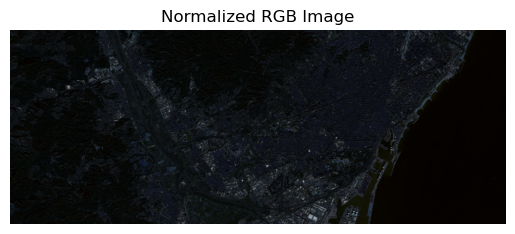

In [18]:
from libtiff import TIFF
import numpy as np
import matplotlib.pyplot as plt

# Obrim i llegim una imatge ".tif"
tif = TIFF.open('output/openEO_2023-01-07Z.tif') 
image = tif.read_image()


# Extraiem i normalitzem les dades RGB del sentinel2: B02, B03, B04
Normalitzador = 1
rgb_array = image[0:3, :, :]*Normalitzador  

# Ordenem l'array de forma que quedi: [amplada, altura, num_bandes] (actualment tenim: [num_bandes, amplada, altura])
rgb_image = np.transpose(rgb_array, (1, 2, 0))

# Plot the normalized RGB image
plt.imshow(rgb_image)
plt.title("Normalized RGB Image")
plt.axis('off')
plt.show()


### Imprimir 2-Bandes

En aquest exemple s'imprimeixen dues bandes del sentinel3_OLCI_L1B, les B03 i B04. Aquestes bandes ocupen els canals Red i Green d'una imatge RGB amb el Blau a zero.

TIFFReadDirectory: Warning, Unknown field with tag 33550 (0x830e) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 33922 (0x8482) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42112 (0xa480) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42113 (0xa481) encountered.
TIFFReadDirectory: Warning, Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples..


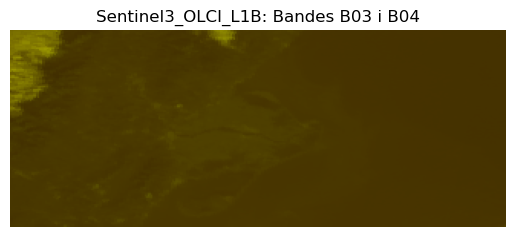

In [19]:
from libtiff import TIFF
import numpy as np
import matplotlib.pyplot as plt

# Obrim i llegim una imatge ".tif"
tif = TIFF.open('outputs_sentinel3_OLCI_L1B/Deltebre_2023/openEO_2023-01-05Z.tif') 
imatge = tif.read_image()

# Seleccionem les dues primeres bandes: "B03" i "B04"
Normalitzador = 10000
canal_B03 = imatge[0, :, :]*Normalitzador
canal_B04 = imatge[1, :, :]*Normalitzador

# Ordenem l'array de forma que quedi: [amplada, altura, num_bandes] (actualment tenim: [num_bandes, amplada, altura])
# En aquest exeple no cal ja que al separar per bandes individuals també ens hem carregat la dimensió de num_bandes
#canal_B03 = np.transpose(canal_B03, (1, 2, 0))
#canal_B04 = np.transpose(canal_B04, (1, 2, 0))

# Creem i emplenem la imatge rgb 
rgb_image = np.zeros((canal_B03.shape[0], canal_B03.shape[1], 3))
rgb_image[:, :, 0] = canal_B03  # Red channel
rgb_image[:, :, 1] = canal_B04  # Green channel
rgb_image[:, :, 2] = 0          # Blue channel (set to 0)

# Plot the RGB image
plt.imshow(rgb_image)
plt.title("Sentinel3_OLCI_L1B: Bandes B03 i B04")
plt.axis("off")
plt.show()

### Animació dues bandes

En aquest exeple mostrem com mostrar les dades de tot un any en una animació feta en matplotlib.

MovieWriter ffmpeg unavailable; using Pillow instead.


TIFFReadDirectory: Warning, Unknown field with tag 33550 (0x830e) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 33922 (0x8482) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42112 (0xa480) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 42113 (0xa481) encountered.
TIFFReadDirectory: Warning, Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples..
TIFFReadDirectory: Warning, Unknown field with tag 33550 (0x830e) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 33922 (0x8482) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34735 (0x87af) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 34736 (0x87b0) encountered.
TIFFReadDirectory: Warning, Unknown field

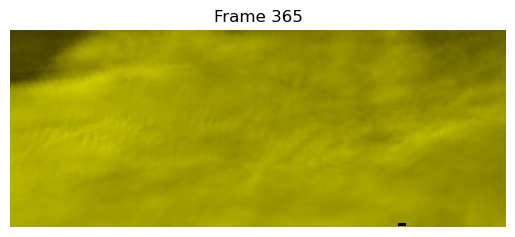

In [ ]:
from libtiff import TIFF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Fem una llista amb tots els noms dels fitxers del directori d'imatges
image_directory = 'outputs_sentinel3_OLCI_L1B/Deltebre_2023'
image_files = sorted([f for f in os.listdir(image_directory) if f.endswith('.tif')])


def load_image(file_path):
    tif = TIFF.open(image_directory+'/'+file_path) 
    return tif.read_image()

def crear_imatge_rgb(imatge_original):
    # Seleccionem les dues primeres bandes: "B03" i "B04"
    Normalitzador = 10000 # Sentinel 3 10.000 va bé, sentinel2 millor 1 o 10, no es ciencia exacta

    canal_R = imatge_original[0, :, :]*Normalitzador # Actualitzar els valors dels index o igualar tot a zero depenent de les bandes
    canal_G = imatge_original[1, :, :]*Normalitzador
    canal_B = 0
    

    # Creem i emplenem la imatge rgb 
    rgb_image = np.zeros((canal_R.shape[0], canal_R.shape[1], 3))
    rgb_image[:, :, 0] = canal_R  
    rgb_image[:, :, 1] = canal_G  
    rgb_image[:, :, 2] = canal_B  
    
    return rgb_image


# Create figure and axes
fig, ax = plt.subplots()

def update(frame):
    """Update the frame for the animation."""   
    
    rgb_image = crear_imatge_rgb(load_image(image_files[frame]))
    
    ax.clear()
    ax.imshow(rgb_image)
    ax.set_title(f"Frame {frame + 1}")
    ax.axis('off')
    
ani = animation.FuncAnimation(fig, update, frames=len(image_files), repeat=True, interval=200)

# Save the animation as a gif or mp4
ani.save("output/Animacions/animacio.gif", writer='ffmpeg', fps=2) # Important posar el .gif; Es poden augmentar o reduir els fps per visivilitat

plt.show()
